In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn import OneHotEncoder


from layer import HiddenLayer
from activations import *
from losses import *
from network import Network
from regularizers import *
from utils import *

random.seed(42)
np.random.seed(42)

## Additional Variable Information
    1. class: 0, 1 
    2. a1:    1, 2, 3
    3. a2:    1, 2, 3
    4. a3:    1, 2
    5. a4:    1, 2, 3
    6. a5:    1, 2, 3, 4
    7. a6:    1, 2
    8. Id:    (A unique symbol for each instance)

In [10]:
X_train, X_test, y_train, y_test = read_monk(train_path='./data/monk/monks-2.train', test_path='./data/monk/monks-2.test')

In [11]:
np.random.seed(3)
net = Network(MSE(1))

net.add_layer(
    input_size=len(X_train[0]),
    units_size=5,
    starting=Fan_in(),
    activation=ReLU(),
)
net.add_layer(
    input_size=5,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid()
)

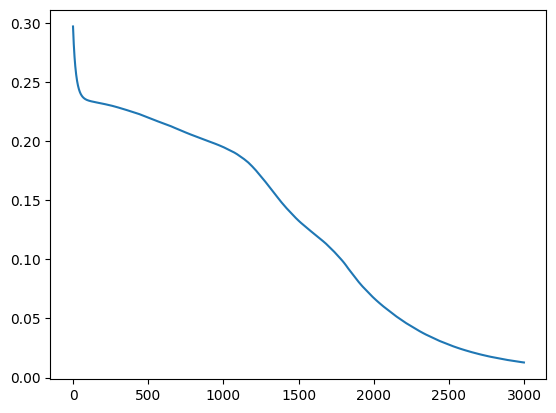

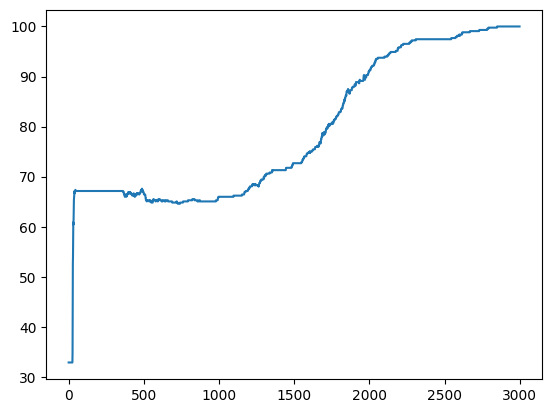

100.0


In [12]:
losses, accuracies = net.train(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, epochs=3000, eta=0.001)

plt.plot(losses)
plt.show()

plt.plot(accuracies)
plt.show()

print(accuracies[-1])

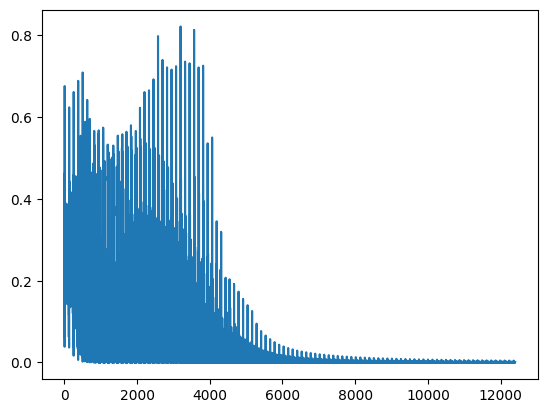

In [15]:
# loop over all the training set
losses = []
for i in range(100):
    for i in range(len(X_train)):
        out = net.forward(X_train[i])
        loss = net.loss.forward(y_pred=out, y_true=y_train[i])
        net.backward(net.loss.backward(y_pred=out, y_true=y_train[i]))
        losses.append(loss)
        
# plot the loss
plt.plot(losses)
plt.show()

In [11]:
# test the network
y_pred = []
for i in range(len(X_test)):
    out = net.forward(X_test[i])
    y_pred.append(out)

y_pred = np.array(y_pred)

y_pred = y_pred.reshape(len(y_pred), 1)
y_test1 = y_test.copy()
y_test1 = y_test1.reshape(len(y_test1), 1)

print(y_test.shape)

for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# check the accuracy in percentage
accuracy = np.sum(y_pred == y_test1) / len(y_test1) * 100
print("Accuracy of the model is: ", accuracy, "%")

(432, 1, 1)
Accuracy of the model is:  100.0 %


# plotting the acc over epochs

In [47]:
np.random.seed(42)
net = Network(MSE(1))

net.add_layer(input_size=len(X_train[0]), units_size=4, starting=Fan_in(), activation=ReLU())
net.add_layer(input_size=4, units_size=1, starting=Range_random(), activation=Sigmoid())
accs = []

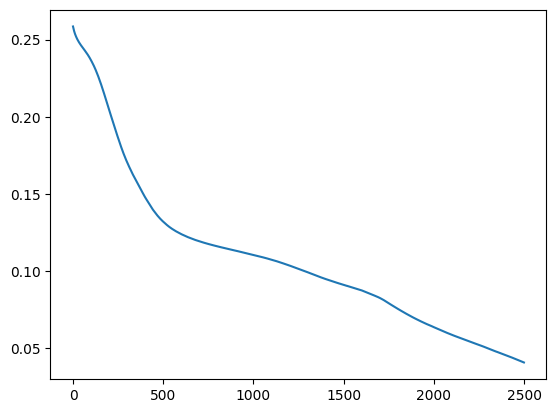

In [48]:
plt.plot(net.train(X_train=X_train, y_train=y_train, epochs=2500, eta=0.001))
plt.show()

In [43]:
def acc():
    y_pred = []
    for i in range(len(X_test)):
        out = net.forward(X_test[i])
        y_pred.append(out)

    y_pred = np.array(y_pred)

    y_pred = y_pred.reshape(len(y_pred), 1)
    y_test1 = y_test.copy()
    y_test1 = y_test1.reshape(len(y_test1), 1)

    for i in range(len(y_pred)):
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0

    # check the accuracy in percentage
    accuracy = np.sum(y_pred == y_test1) / len(y_test1) * 100
    accs.append(accuracy)
    
    #print("Accuracy of the model is: ", accuracy, "%")

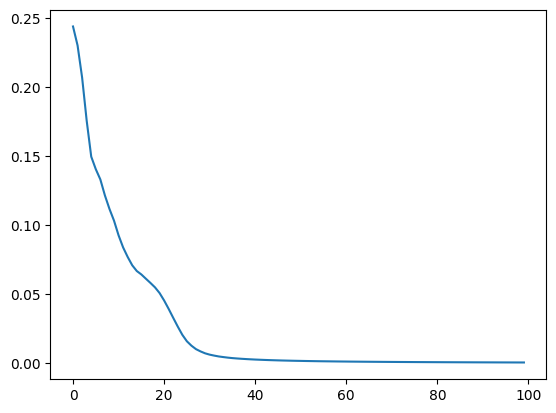

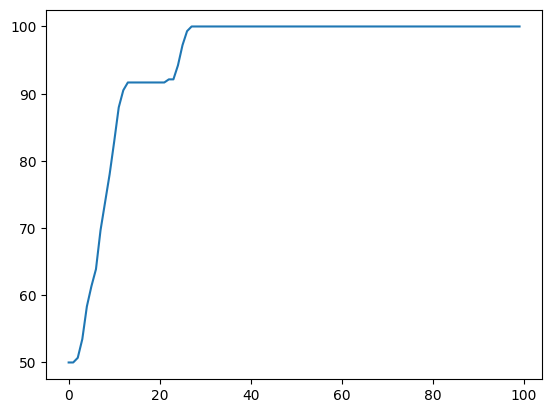

In [25]:
# loop over all the training set
losses = []
for i in range(100):
    loss_sum = 0
    for i in range(len(X_train)):
        out = net.forward(X_train[i])
        loss = net.loss.forward(y_pred=out, y_true=y_train[i])
        net.backward(net.loss.backward(y_pred=out, y_true=y_train[i]))
        loss_sum += loss
    losses.append(loss_sum / len(X_train))
    acc()
        
# plot the loss and accuracy
plt.plot(losses)
plt.show()
plt.plot(accs)
plt.show()
